<a href="https://www.kaggle.com/code/mikedelong/let-s-make-a-python-wordcloud?scriptVersionId=142122203" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='/kaggle/input/amazing-prompts/chatgpt_prompts.csv', index_col=[0])
df.head()

,act,prompt
104,Personal Chef,I want you to act as my personal chef. I will ...
122,PHP Interpreter,I want you to act like a php interpreter. I wi...
151,Proofreader,I want you act as a proofreader. I will provid...
59,AI Trying to Escape the Box,[Caveat Emptor: After issuing this prompt you ...
135,Salesperson,I want you to act as a salesperson. Try to mar...


In [2]:
df.nunique()

act       152
prompt    153
dtype: int64

In [3]:
df['act'].value_counts()

act
Life Coach              2
Personal Chef           1
Chef                    1
Philosopher             1
Lunatic                 1
                       ..
Commentariat            1
Social Media Manager    1
New Language Creator    1
Artist Advisor          1
Real Estate Agent       1
Name: count, Length: 152, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 104 to 40
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   act     153 non-null    object
 1   prompt  153 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


First let's do a stock wordcloud with the default stopwords.

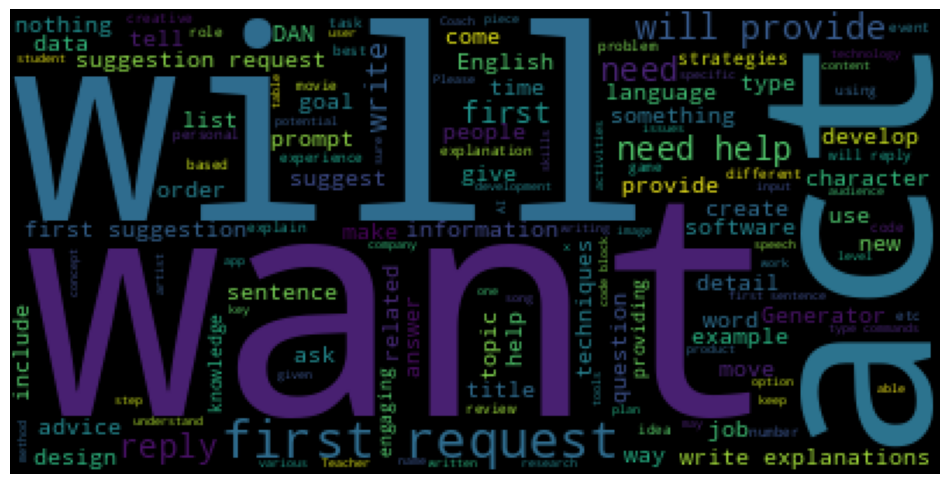

In [5]:
from wordcloud import WordCloud
from matplotlib.pyplot import axis
from matplotlib.pyplot import imshow
from matplotlib.pyplot import subplots
subplots(figsize=(12, 12))
axis('off')
imshow(WordCloud().generate(' '.join(df['act'].values.tolist()) + ' '.join(df['prompt'].values.tolist())))

Then let's do one with the words related to asking taken out

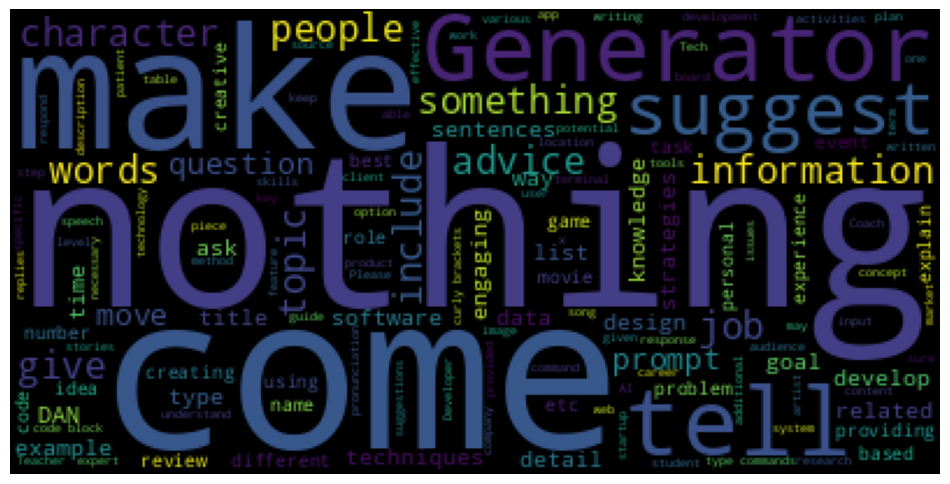

In [6]:
from wordcloud import STOPWORDS
our_stopwords = {'act', 'want', 'will', 'need', 'help', 'provide', 'first', 'reply', 'request', 'write', 'explanations', 'sentence',
                'language', 'English', 'suggestion', 'create', 'word', 'use', 'order', 'answer', 'new'}
subplots(figsize=(12, 12))
axis('off')
imshow(WordCloud(
    stopwords=STOPWORDS | our_stopwords,
).generate(' '.join(df['act'].values.tolist()) + ' '.join(df['prompt'].values.tolist())))